# Aircraft Carrier Flight Path Angles

From the [LSO NATOPS manual](https://www.navyair.com/LSO_NATOPS_Manual.pdf).

### 4.2.7  Effective Glideslope Due to Wind and Deck Motion

The glideslope angle, referred to as
the basic angle aboard ship, is the fixed pitch angle
around which the lens assembly stabilizes. A basic
angle setting of 3.5° is most commonly used, with 4°
used for higher wind-over-deck conditions (38+ knots)
or on the small decks when hook-to-ramp clearance is
near the 10-foot minimum. In moderate wind-over-deck
conditions (32 to 37 knots), a 3.75° basic angle may be
desirable. In Figure 4-7, note that decreased closure rate
of aircraft to ship caused by wind-over-deck reduces the
actual glideslope flown (effective glideslope).

Wind Over Deck (kts) | Basic Angle (degrees) | Effective Glideslope*
:------: | :------: | :------:
35       | 4      | 3.2
30       | 3.5    | 2.8
*Based on a 130kt approach speed

![Glideslope versus RHW](images/Fig4.7-GlideSlope-vs-RHW.png)

### Calculating Effective Glideslope/Flight Path Angle

Given the glideslope angle (Basic Angle) of the meatball, the approach speed of the aircraft and the wind over the deck based on the aircraft carrier's speed we need to calculate the flight path angle that the aircraft will follow, also known as the 'effective glideslope'.

Some simple trigonometry.

![Flight Path Trig](images/FlightPathTrig.png)

$$ h = AS tan(BA) $$

$$ \gamma = atan(\frac{h}{WOD + AS}) $$

Some code to implement the flight path angle calculation and to compare the results across different glide slope angles with varying amounts of wind over the deck.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math

In [2]:
def effectiveFlightPathAngle(glideslope_angle, approach_speed, wind_over_deck):
    h = approach_speed * math.tan(math.radians(glideslope_angle))
    return math.degrees(math.atan(h / (wind_over_deck + approach_speed)))

In [3]:
effectiveFlightPathAngle(4.0, 130, 35)

3.153457168643915

In [4]:
effectiveFlightPathAngle(3.5, 130, 30)

2.844952116139883

<IPython.core.display.Javascript object>


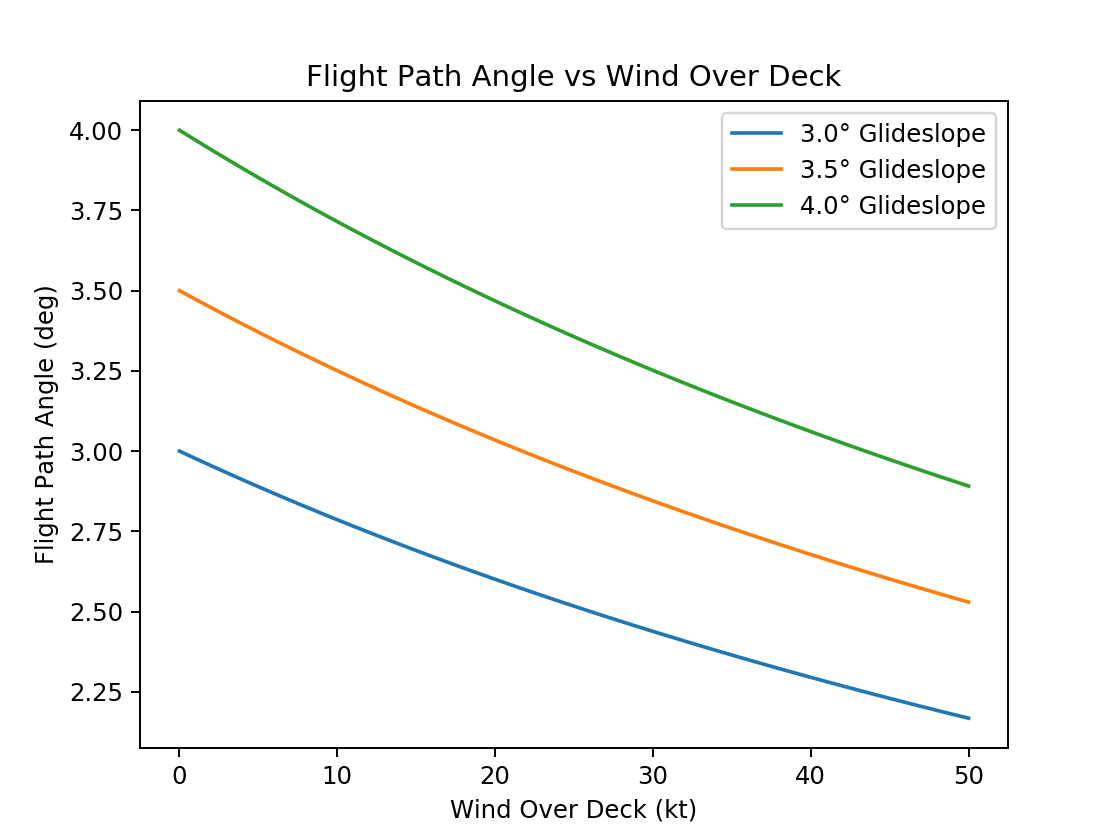

In [5]:
plt.figure()

approach_speed = 130
glide_slopes = [3.0, 3.5, 4.0]

for glide_slope in glide_slopes:
    points = []
    for wod in range(0, 51, 1):
        points.append((wod, effectiveFlightPathAngle(glide_slope, approach_speed, wod)))
    wind_over_deck, gamma = zip(*points)
    plt.plot(wind_over_deck, gamma, label=f'{glide_slope}° Glideslope')
        
plt.xlabel('Wind Over Deck (kt)')
plt.ylabel('Flight Path Angle (deg)')
plt.legend()
plt.title('Flight Path Angle vs Wind Over Deck');

<IPython.core.display.Javascript object>


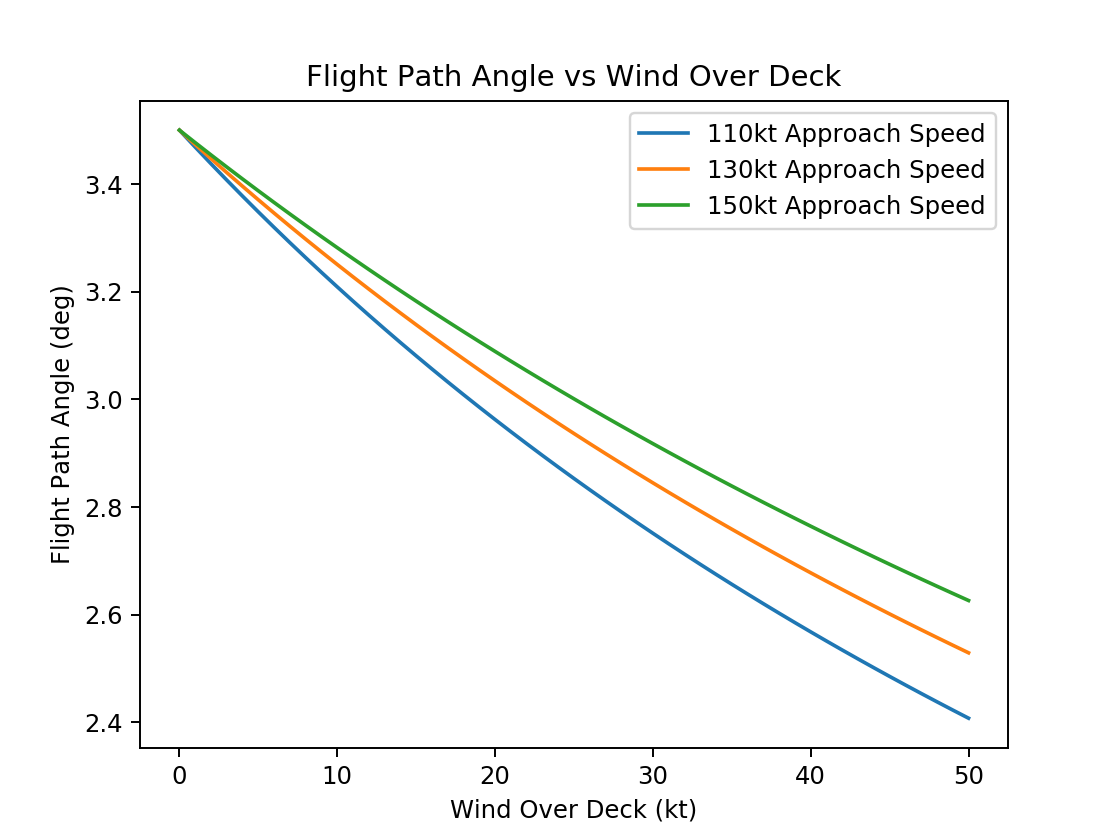

In [6]:
plt.figure()

approach_speeds = [110, 130, 150]
glide_slope = 3.5

for approach_speed in approach_speeds:
    points = []
    for wod in range(0, 51, 1):
        points.append((wod, effectiveFlightPathAngle(glide_slope, approach_speed, wod)))
    wind_over_deck, gamma = zip(*points)
    plt.plot(wind_over_deck, gamma, label=f'{approach_speed}kt Approach Speed')
        
plt.xlabel('Wind Over Deck (kt)')
plt.ylabel('Flight Path Angle (deg)')
plt.legend()
plt.title('Flight Path Angle vs Wind Over Deck');        